The top 20 conditions of Random Forest obtained using 120 descriptors 
Predicting reaction performance in C–N cross-coupling using machine learning
Experimental data obtained from Ahneman et al publication in Science DOI: 10.1126/science.aar5169
                    

                                                                            Gashaw M. Goshu, June, 2020

In [22]:
# Import relevant libraries

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sn
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
#import utils
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
# open a file containing descriptors and yield
data = pd.read_csv(r"C:\Users\Gashaw\Documents\Descriptor_and_yield_table.csv")


In [3]:
data

,additive_*C3_NMR_shift,additive_*C3_electrostatic_charge,additive_*C4_NMR_shift,additive_*C4_electrostatic_charge,additive_*C5_NMR_shift,additive_*C5_electrostatic_charge,additive_*N1_electrostatic_charge,additive_*O1_electrostatic_charge,additive_E_HOMO,additive_E_LUMO,...,ligand_V6_frequency,ligand_V6_intensity,ligand_V7_frequency,ligand_V7_intensity,ligand_V8_frequency,ligand_V8_intensity,ligand_V9_frequency,ligand_V9_intensity,ligand_dipole_moment,yield
0,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,10.657812
1,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,14.747896
2,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,18.278686
3,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,2.475058
4,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,6.119058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,57.426670
3956,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,86.233157
3957,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,1.440081
3958,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,43.538365


In [4]:
features =["additive_*C3_NMR_shift","additive_*C4_electrostatic_charge","additive_*C4_NMR_shift",
           "additive_*C5_electrostatic_charge","additive_*O1_electrostatic_charge",         
            "additive_E_HOMO","additive_E_LUMO","additive_molecular_volume","aryl_halide_*C3_NMR_shift",
           "aryl_halide_*H2_electrostatic_charge","aryl_halide_E_LUMO","aryl_halide_V2_frequency",
           "aryl_halide_V3_frequency","base_*N1_electrostatic_charge","additive_V1_intensity",
          "base_electronegativity","base_hardness","base_molecular_volume","base_molecular_weight","base_surface_area"]
X_data = data[features] # 14 descriptors that are commonly identified in both RF and XGBoost  
y_data = data['yield'] # Yield of the 3560 rows is stored in the y_data variable


In [5]:
X_data

,additive_*C3_NMR_shift,additive_*C4_electrostatic_charge,additive_*C4_NMR_shift,additive_*C5_electrostatic_charge,additive_*O1_electrostatic_charge,additive_E_HOMO,additive_E_LUMO,additive_molecular_volume,aryl_halide_*C3_NMR_shift,aryl_halide_*H2_electrostatic_charge,aryl_halide_E_LUMO,aryl_halide_V2_frequency,aryl_halide_V3_frequency,base_*N1_electrostatic_charge,additive_V1_intensity,base_electronegativity,base_hardness,base_molecular_volume,base_molecular_weight,base_surface_area
0,143.12,-0.447,93.06,0.292,-0.057,-0.2317,-0.0487,154.41,120.97,0.143,-0.0396,1351.720,1634.876,-0.755,3.681,0.06,0.11,376.47,339.409,424.90
1,143.12,-0.447,93.06,0.292,-0.057,-0.2317,-0.0487,154.41,120.95,0.100,-0.0413,1349.391,1632.664,-0.755,3.681,0.06,0.11,376.47,339.409,424.90
2,143.12,-0.447,93.06,0.292,-0.057,-0.2317,-0.0487,154.41,181.37,0.083,-0.0429,1346.735,1626.855,-0.755,3.681,0.06,0.11,376.47,339.409,424.90
3,143.12,-0.447,93.06,0.292,-0.057,-0.2317,-0.0487,154.41,112.08,0.137,-0.0118,1351.340,1632.373,-0.755,3.681,0.06,0.11,376.47,339.409,424.90
4,143.12,-0.447,93.06,0.292,-0.057,-0.2317,-0.0487,154.41,112.39,0.099,-0.3500,1532.172,1653.924,-0.755,3.681,0.06,0.11,376.47,339.409,424.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,152.98,-0.589,98.09,0.387,-0.068,-0.2337,-0.0696,190.33,129.62,0.138,-0.0391,1311.840,1626.612,-0.611,21.127,0.07,0.12,170.58,153.229,188.57
3956,152.98,-0.589,98.09,0.387,-0.068,-0.2337,-0.0696,190.33,256.46,0.137,-0.0383,1305.598,1620.967,-0.611,21.127,0.07,0.12,170.58,153.229,188.57
3957,152.98,-0.589,98.09,0.387,-0.068,-0.2337,-0.0696,190.33,117.10,0.102,-0.0380,1298.019,1626.114,-0.611,21.127,0.07,0.12,170.58,153.229,188.57
3958,152.98,-0.589,98.09,0.387,-0.068,-0.2337,-0.0696,190.33,117.61,0.065,-0.0390,1295.516,1623.855,-0.611,21.127,0.07,0.12,170.58,153.229,188.57


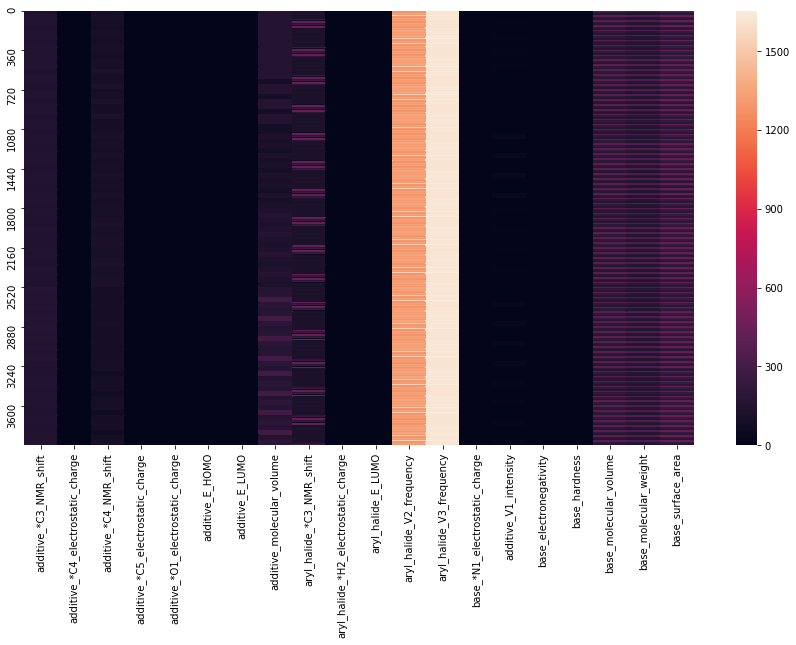

In [6]:
# Set the width and height of the figure
plt.figure(figsize=(15,8))
# Generate heatmap for the seven columns or descriptors
sn.heatmap(data=X_data,yticklabels=360)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data,test_size = 0.3, random_state=1)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [8]:
# Data preprocessing
pipe = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('scale', StandardScaler()),
         ('model', rf)])

In [9]:
# Model Training and prediction
pipe.fit(X_train,y_train) # training using 70% of the data
predicted_yield = pipe.predict(X_valid) # predicting yield for 30% of the data

In [10]:
# Model accuracy using root mean square error 
rmse = np.sqrt(mean_squared_error(y_valid, predicted_yield )) 
print('rmse:', rmse)

rmse: 15.975062374521404


In [11]:
# R^2 (coefficient of determination) regression score function: 
R2 =r2_score(y_valid, predicted_yield )
print('R^2:', R2)

R^2: 0.6695772353695355


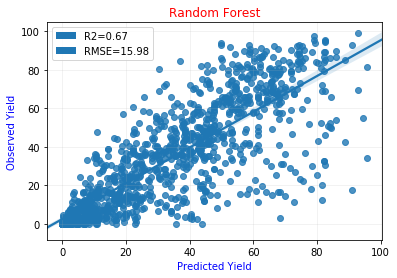

In [12]:
sn.regplot(x=predicted_yield , y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("Random Forest", color='red')
plt.grid(alpha=0.2)
R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
rmse = mpatches.Patch(label="RMSE={:04.2f}".format(rmse))
plt.legend(handles=[R2, rmse])

In [13]:
# Feature importance Random forest
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(pipe, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Using TensorFlow backend.


Weight,Feature
0.6071 ± 0.0682,aryl_halide_*C3_NMR_shift
0.2107 ± 0.0161,additive_*C3_NMR_shift
0.1914 ± 0.0057,aryl_halide_*H2_electrostatic_charge
0.0136 ± 0.0094,aryl_halide_E_LUMO
0.0024 ± 0.0060,additive_E_HOMO
0.0004 ± 0.0039,base_electronegativity
-0.0002 ± 0.0085,additive_*C4_NMR_shift
-0.0036 ± 0.0056,base_hardness
-0.0044 ± 0.0058,base_molecular_volume
-0.0049 ± 0.0040,base_surface_area


In [14]:
# XGBoost the most widely used ML model in kaggle competition
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, random_state=42)


In [15]:
pipe2 = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('preprocessor', SimpleImputer()),
        ('model', xgb)])

In [16]:
# Model Training and prediction
pipe2.fit(X_train,y_train) # training using 70% of the data
predicted_yield2 = pipe2.predict(X_valid) # predicting yield for 30% of the data

In [17]:
# Model accuracy using root mean square error 
rmse2 = np.sqrt(mean_squared_error(y_valid, predicted_yield2))  
print('rmse:', rmse2)

rmse: 16.384455289552385


In [18]:
# R^2 (coefficient of determination) regression score function: 
R_2 =r2_score(y_valid, predicted_yield2)
print('R^2:', R_2)

R^2: 0.6524247444689542


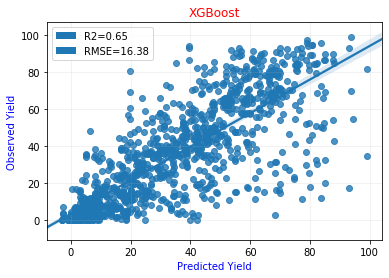

In [19]:
sn.regplot(x=predicted_yield2, y=y_valid)
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("XGBoost", color='red')
plt.grid(alpha=0.2)
R_2 = mpatches.Patch(label="R2={:04.2f}".format(R_2))
rmse2 = mpatches.Patch(label="RMSE={:04.2f}".format(rmse2))
plt.legend(handles=[R_2, rmse2])

In [20]:
# Feature importance Random forest
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(pipe2, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Weight,Feature
0.4792 ± 0.0506,aryl_halide_*C3_NMR_shift
0.2285 ± 0.0186,additive_*C3_NMR_shift
0.1592 ± 0.0195,aryl_halide_*H2_electrostatic_charge
0.0742 ± 0.0181,base_electronegativity
0.0572 ± 0.0143,base_*N1_electrostatic_charge
0.0186 ± 0.0200,additive_*C4_NMR_shift
0.0109 ± 0.0133,aryl_halide_V3_frequency
0.0080 ± 0.0058,aryl_halide_E_LUMO
0.0054 ± 0.0083,aryl_halide_V2_frequency
0 ± 0.0000,base_hardness
